Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 
a. Import the necessary packages
b. Load the training and testing data 
c. Define the network architecture using Keras 
d. Train the model using SGD with 11 epochs
e. Evaluate the network  
f. Plot the training loss and accuracy

A) Import the necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

2022-11-14 05:02:39.076513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 05:02:39.177064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 05:02:39.177081: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 05:02:39.200061: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 05:02:39.701634: W tensorflow/stream_executor/platform/de

B) Load the training and testing data 

In [2]:
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
#Reshape so that for each image we will have one single array
X_train = X_train.reshape(X_train.shape[0], 28 * 28 * 1)
X_test = X_test.reshape(X_test.shape[0], 28 * 28 * 1)
# normalize to range 0-1
X_train = X_train.astype("float32") / 255.0 
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

C) Define the network architecture using Keras 

In [4]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
#Note last is softmax

2022-11-14 05:02:40.871254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-14 05:02:40.871274: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-14 05:02:40.871289: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (samarth-Laptop): /proc/driver/nvidia/version does not exist
2022-11-14 05:02:40.871431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


D) Train the model using SGD with 11 epochs

In [5]:
sgd = SGD(0.01) #Inside the function Learning rate is given
epochs=11

#Used as a loss function for multi-class classification model where there are two or more output labels. 
#The output label is assigned one-hot category encoding value in form of 0s and 1. 
#The output label, if present in integer form, is converted into categorical encoding using 
#keras.utils to_categorical method.
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/11
469/469 [==============================] - 1s 3ms/step - loss: 2.3000 - accuracy: 0.1535 - val_loss: 2.2598 - val_accuracy: 0.1949
Epoch 2/11
469/469 [==============================] - 1s 2ms/step - loss: 2.2339 - accuracy: 0.3110 - val_loss: 2.2004 - val_accuracy: 0.4093
Epoch 3/11
469/469 [==============================] - 1s 2ms/step - loss: 2.1656 - accuracy: 0.4364 - val_loss: 2.1188 - val_accuracy: 0.5442
Epoch 4/11
469/469 [==============================] - 1s 2ms/step - loss: 2.0692 - accuracy: 0.5271 - val_loss: 2.0021 - val_accuracy: 0.5815
Epoch 5/11
469/469 [==============================] - 1s 2ms/step - loss: 1.9352 - accuracy: 0.5895 - val_loss: 1.8463 - val_accuracy: 0.6034
Epoch 6/11
469/469 [==============================] - 1s 2ms/step - loss: 1.7672 - accuracy: 0.6312 - val_loss: 1.6647 - val_accuracy: 0.6306
Epoch 7/11
469/469 [==============================] - 1s 2ms/step - loss: 1.5850 - accuracy: 0.6689 - val_loss: 1.4814 - val_accuracy: 0.7092
Epoch 

e. Evaluate the network  

In [6]:
predictions = model.predict(X_test, batch_size=128)

79/79 [==============================] - 0s 1ms/step


In [7]:
len(predictions.argmax(axis=1))

10000

Y_test[0] -> contains in binary which it the number like 0,0,0,0,0,0,0,1,0,0, this means that the number is 7.
predictions[0] -> contains the probabilty of that image being a particular number like 10%,20%,5%,3%,12%,34%,80%,12%,..
Y_test.argmax(axis=1),predictions.argmax(axis=1) -> Takes that number index which has the biggest number.
target_names= the labels liek 0,1,2,3,4,5,6,7,8,9

In [8]:
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       980
           1       0.79      0.99      0.88      1135
           2       0.85      0.70      0.77      1032
           3       0.71      0.81      0.76      1010
           4       0.71      0.85      0.77       982
           5       0.83      0.43      0.57       892
           6       0.84      0.90      0.87       958
           7       0.75      0.85      0.79      1028
           8       0.78      0.67      0.72       974
           9       0.78      0.57      0.66      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.78      0.77     10000



f. Plot the training loss and accuracy

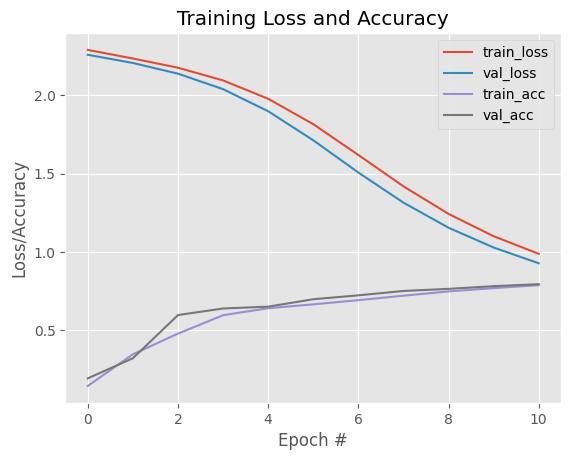

In [20]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()